# III - Redes convolucionales

## Importar librerias

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

## Parametros de entrenamiento

In [4]:
lr = 1.0
epochs = 5
batch_size = 32
np.random.seed(14)

## Cargar y visualizar el dataset

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_classes = np.max(np.unique(y_train)) + 1

170508288/170498071 [==============================] - 152s 1us/step


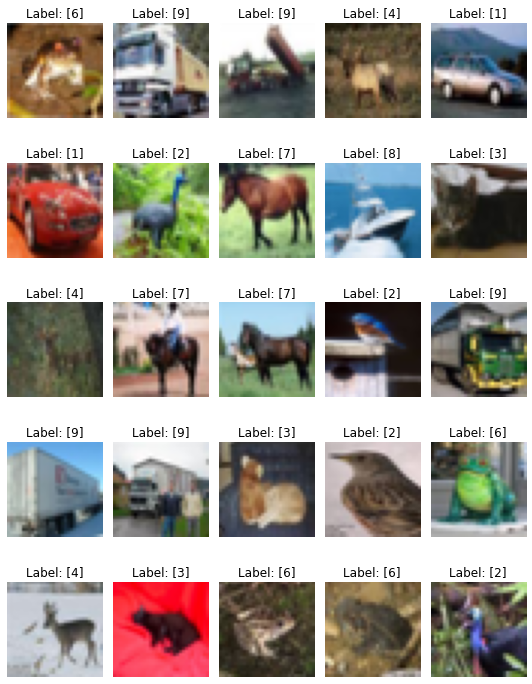

In [6]:
num = 25
images = x_train[:num]
labels = y_train[:num]
num_row = 5
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## Preparacion de los datos

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding

In [11]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

In [12]:
x_train.shape

(50000, 3072)

## Modelo de redes densas

In [17]:
# Model
#---------------------------------------------------------------------#
input_layer = Input(shape=x_train.shape[1:])
dense_1 = Dense(500, activation='relu') (input_layer)
dropout_1 = Dropout(0.25) (dense_1)
dense_2 = Dense(500, activation='relu') (dropout_1)
dropout_2 = Dropout(0.25) (dense_2)
dense_3 = Dense(500, activation='relu') (dropout_2)
dropout_3 = Dropout(0.25) (dense_3)
output_layer = Dense(n_classes, activation='softmax') (dropout_3)
#---------------------------------------------------------------------#
model_dense = Model(input_layer, output_layer)

In [18]:
Adadelta_optimizer = Adadelta(learning_rate=lr, rho=0.95)
model_dense.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc', 'mse'])
model_dense.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_8 (Dense)             (None, 500)               1536500   
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dropout_8 (Dropout)         (None, 500)               0   

## Entrenar el modelo

In [19]:
start_time = time.time()
history_dense = model_dense.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))

Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 2.0287 - acc: 0.2459 - mse: 0.0839 - val_loss: 1.8667 - val_acc: 0.3240 - val_mse: 0.0798
Epoch 2/5
1563/1563 [==============================] - 21s 14ms/step - loss: 1.8985 - acc: 0.3067 - mse: 0.0804 - val_loss: 1.8371 - val_acc: 0.3410 - val_mse: 0.0779
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8460 - acc: 0.3286 - mse: 0.0787 - val_loss: 1.8756 - val_acc: 0.3091 - val_mse: 0.0804
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8213 - acc: 0.3412 - mse: 0.0779 - val_loss: 1.8204 - val_acc: 0.3304 - val_mse: 0.0783
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7998 - acc: 0.3497 - mse: 0.0772 - val_loss: 1.7541 - val_acc: 0.3886 - val_mse: 0.0760

Elapsed Dense Model training time: 105.57940 seconds


## Modelo de redes convolucionales

In [21]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_classes = np.max(np.unique(y_train)) + 1

In [22]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [23]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding

In [30]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
# Model
#---------------------------------------------------------------------#
input_layer = Input(shape=x_train.shape[1:])
conv_1 = Conv2D(32, (3, 3), activation='relu') (input_layer)
conv_2 = Conv2D(64, (3, 3), activation='relu') (conv_1)
pool_1 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
dropout_1 = Dropout(0.25) (pool_1)
flatten_1 = Flatten() (dropout_1)
dense_1 = Dense(100, activation='relu') (flatten_1)
dropout_2 = Dropout(0.25) (dense_1)
output_layer = Dense(n_classes, activation='softmax') (dropout_2)
#---------------------------------------------------------------------#
model_conv = Model(input_layer, output_layer)

In [27]:
model_conv.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc', 'mse'])
model_conv.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                           

In [31]:
start_time = time.time()
history_conv = model_conv.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))

Epoch 1/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5160 - acc: 0.4597 - mse: 0.0671 - val_loss: 1.1231 - val_acc: 0.6036 - val_mse: 0.0525
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.0989 - acc: 0.6175 - mse: 0.0512 - val_loss: 1.0114 - val_acc: 0.6494 - val_mse: 0.0477
Epoch 3/5
1563/1563 [==============================] - 122s 78ms/step - loss: 0.9354 - acc: 0.6767 - mse: 0.0441 - val_loss: 0.9952 - val_acc: 0.6560 - val_mse: 0.0461
Epoch 4/5
1563/1563 [==============================] - 126s 81ms/step - loss: 0.8318 - acc: 0.7129 - mse: 0.0394 - val_loss: 0.9038 - val_acc: 0.6948 - val_mse: 0.0420
Epoch 5/5
1563/1563 [==============================] - 127s 81ms/step - loss: 0.7465 - acc: 0.7438 - mse: 0.0357 - val_loss: 0.8758 - val_acc: 0.7043 - val_mse: 0.0408

Elapsed Dense Model training time: 567.90464 seconds


## Evaluar el proceso de entrenamiento

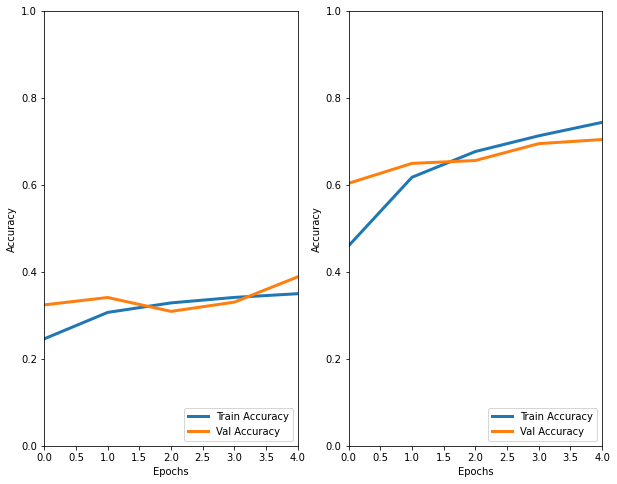

In [48]:
f = plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(history_dense.history['acc'], linewidth=3, label='Train Accuracy')
plt.plot(history_dense.history['val_acc'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 4, 0, 1])
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_conv.history['acc'], linewidth=3, label='Train Accuracy')
plt.plot(history_conv.history['val_acc'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 4, 0, 1])
plt.legend(loc='lower right')

plt.show()

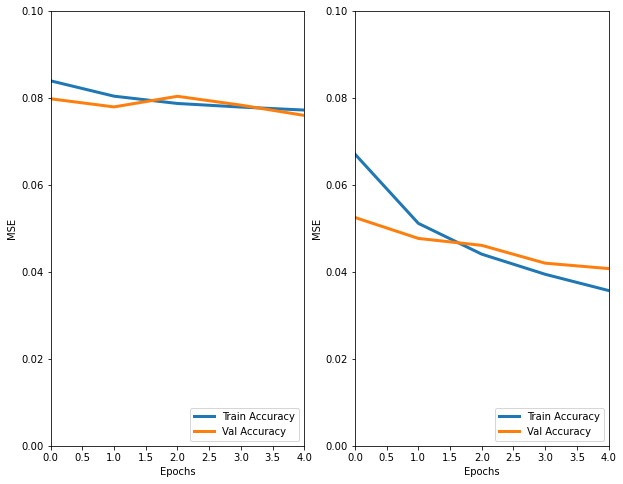

In [51]:
f = plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(history_dense.history['mse'], linewidth=3, label='Train Accuracy')
plt.plot(history_dense.history['val_mse'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.axis([0, 4, 0, 0.1])
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_conv.history['mse'], linewidth=3, label='Train Accuracy')
plt.plot(history_conv.history['val_mse'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.axis([0, 4, 0, 0.1])
plt.legend(loc='lower right')

plt.show()